In [6]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt

In [10]:


# Verifique o nome exato do arquivo que apareceu na pasta
df = pd.read_csv('/Users/gustavocorreia/Documents/Repositories/Bitcoin_price/btcusd_1-min_data.csv')
print(df.info())


<class 'pandas.DataFrame'>
RangeIndex: 7399839 entries, 0 to 7399838
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 338.7 MB
None


In [11]:


# 1. Carregar colunas essenciais para poupar RAM
cols = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']


# 2. Converter Timestamp (UNIX) para Datetime real
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.set_index('Timestamp', inplace=True)

# 3. Tratar valores nulos (NaN)
# Em cripto, se não houve negociação no minuto, mantemos o preço anterior
df['Close'] = df['Close'].ffill() 
df['Open'] = df['Open'].fillna(df['Close'])
df['High'] = df['High'].fillna(df['Close'])
df['Low'] = df['Low'].fillna(df['Close'])
df['Volume'] = df['Volume'].fillna(0)

# 4. Resample: De Minutos para Dias ('D')
# Treinar um modelo minuto a minuto seria pesado demais e ruidoso
df_daily = df.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

print("Limpeza concluída!")
df_daily.head()

Limpeza concluída!


,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-01,4.58,4.84,4.58,4.84,10.000000
2012-01-02,4.84,5.00,4.84,5.00,10.100000
2012-01-03,5.00,5.32,5.00,5.29,107.085281
2012-01-04,5.29,5.57,4.93,5.57,107.233260
2012-01-05,5.57,6.46,5.57,6.42,70.328742


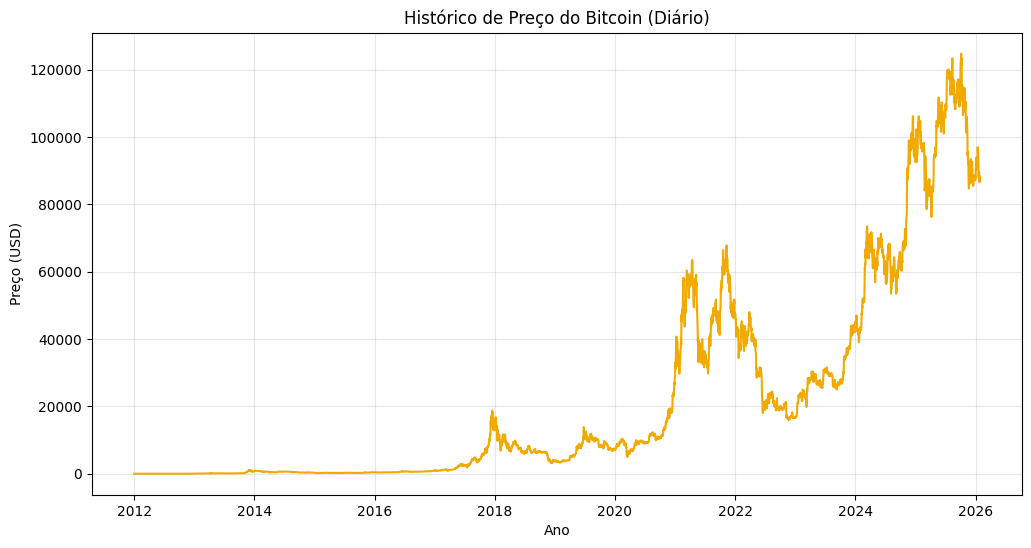

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df_daily['Close'], color='#f2a900') # Cor do Bitcoin!
plt.title('Histórico de Preço do Bitcoin (Diário)')
plt.xlabel('Ano')
plt.ylabel('Preço (USD)')
plt.grid(True, alpha=0.3)
plt.show()